<h2><center>Week 7 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

# Authors: Michael Jopiti and Léo Wütschert

Exercises for the topics covered in the seventh lecture.

The exercise will be marked as passed if you show a reasonable understanding of the plotting concepts covered in the lecture. You do **not** have to make a perfect replica of the example plots to pass.

The exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing:
- one .py or .ipynb file with code
- the created figure as a *png* file. 
The name of the .zip **and** the .py/.ipynb file **and** the png file **must** be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, April 18, 2024.**

<h3 style="text-align:left;">Exercise - CO2 emissions<span style="float: right"></span></h3>

Re-create the plots found in ’plots.png’ using the data found in ’owid-co2-data-reduced.csv’ (source: https://github.com/owid/co2-data).

You do not have to make perfect replicas of the plots, but you should show that you are able to use the concepts shown in the lecture. If there are aspects of the plots you consider not to be reproducible given the information provided, comment this in your code. For instance, the size of dots may not be possible to reproduce exactly, and you will be awarded points for showing you are able to modify this parameter, where relevant, and pointing this out in your comments, rather than for reproducing the exact same dot size. The plots are made using matplotlib and seaborn, working on the dataframe.

Relevant concepts for exercise completion are:
- Saving
- Subplots (Object-oriented interface)
- Setting colors
- Adjusting axes limits
- Labels and legend
- Using seaborn together with pandas and matplotlib


Specific plot types requested:
- Line plot
- Violin plot
- Scatter plot

**Useful tips**:
- to select only the actual countries, check those that have an *iso_code* in the dataframe.
- the values "per capita" are obtained by normalizing to the population.
- the "percentage" values are obtained by normalizing on the total emissions.

**NB**: if you do not have seaborn installed, install it through *pip install seaborn*.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df_CO2 = pd.read_csv('./dataW7/owid-co2-data-reduced.csv')
df_CO2

,country,year,iso_code,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,temperature_change_from_co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,10.715,6.097,0.0,4.060,0.001
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,0.473,9.775,5.571,0.0,3.731,0.001
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,0.496,7.850,4.309,0.0,3.045,0.001
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,0.531,8.396,4.548,0.0,3.317,0.001


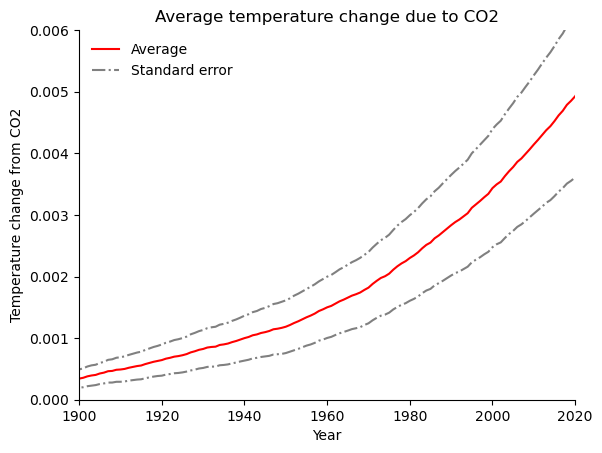

In [9]:
df_countries = df_CO2[df_CO2['iso_code'].notna()]

average_temp = df_countries.groupby('year')['temperature_change_from_co2'].mean()
standard_error = df_countries.groupby('year')['temperature_change_from_co2'].sem()
upper_bound = average_temp + standard_error
lower_bound = average_temp - standard_error

plt.plot(average_temp.index, average_temp, '-r', label = "Average")
plt.plot(average_temp.index, upper_bound, linestyle = '-.', color = 'gray', label = "Standard error")
plt.plot(average_temp.index, lower_bound, linestyle = '-.', color = 'gray')
plt.xlabel("Year")
plt.ylabel("Temperature change from CO2")
plt.title("Average temperature change due to CO2")
plt.legend(frameon = False)
plt.xlim(1900,2020)
plt.ylim(0, 0.006)
axis = plt.gca()
axis.spines["top"].set_visible(False)
axis.spines["right"].set_visible(False)
plt.show()

In [5]:
df_countries

,country,year,iso_code,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,temperature_change_from_co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,10.715,6.097,0.0,4.060,0.001
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,0.473,9.775,5.571,0.0,3.731,0.001
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,0.496,7.850,4.309,0.0,3.045,0.001
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,0.531,8.396,4.548,0.0,3.317,0.001


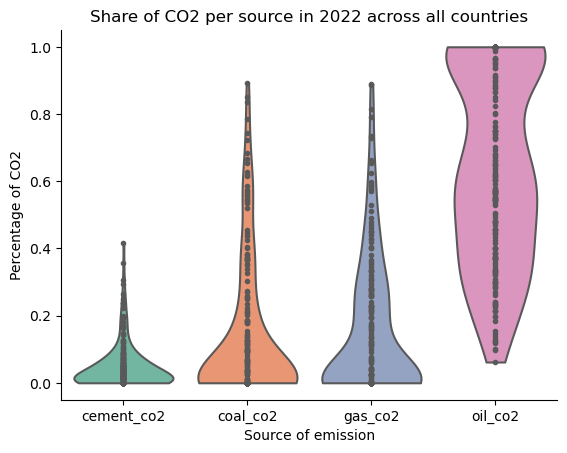

In [10]:
df_countries2022 = df_countries[df_countries["year"] == 2022]

cement_proportion = df_countries2022['cement_co2'] / df_countries2022['co2']
coal_proportion = df_countries2022['coal_co2'] / df_countries2022['co2']
gas_proportion = df_countries2022['gas_co2'] / df_countries2022['co2']
oil_proportion = df_countries2022['oil_co2'] / df_countries2022['co2']

# Create a DataFrame for the proportions
proportions = pd.DataFrame({
    'Source of emission': ['cement_co2']*len(cement_proportion) + ['coal_co2']*len(coal_proportion) + ['gas_co2']*len(gas_proportion) + ['oil_co2']*len(oil_proportion),
    'Percentage of CO2': pd.concat([cement_proportion, coal_proportion, gas_proportion, oil_proportion], ignore_index=True)
})

sns.violinplot(data=proportions, x="Source of emission", y="Percentage of CO2", palette="Set2", cut=0, inner="point", scale="width")
plt.title('Share of CO2 per source in 2022 across all countries')
axis = plt.gca()
axis.spines["top"].set_visible(False)
axis.spines["right"].set_visible(False)
plt.show()

# Graphs on the right

/var/folders/9q/lt7lbr7d4ds9w_z2468pbnr40000gn/T/ipykernel_67830/1000357007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia["per-Capita_CO2"] = (asia["co2"] / asia["population"])
/var/folders/9q/lt7lbr7d4ds9w_z2468pbnr40000gn/T/ipykernel_67830/1000357007.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe["per-Capita_CO2"] = (europe["co2"] / europe["population"])
/var/folders/9q/lt7lbr7d4ds9w_z2468pbnr40000gn/T/ipykernel_67830/1000357007.py:12: SettingWithCopyWarning: 
A value is trying to

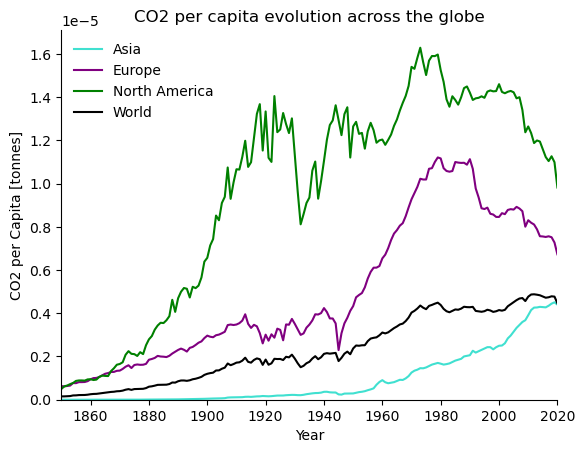

In [7]:
#####       GRAPH TOP-RIGHT

    #build sub-dataframes to store data relative to each region: Asia, Europe, North America and World -> do not have iso_code!
asia = df_CO2[df_CO2["country"] == "Asia"]  #length 273
europe = df_CO2[df_CO2["country"] == "Europe"]
northAmerica = df_CO2[df_CO2["country"] == "North America"]
world = df_CO2[df_CO2["country"] == "World"]

    #create per-capita column and calculate its value
asia["per-Capita_CO2"] = (asia["co2"] / asia["population"])
europe["per-Capita_CO2"] = (europe["co2"] / europe["population"])
northAmerica["per-Capita_CO2"] = (northAmerica["co2"] / northAmerica["population"])
world["per-Capita_CO2"] = (world["co2"] / world["population"])

    #maintain only rows after 1850
asia = asia[(asia["year"] >= 1850) & (asia["year"] <= 2020)]
europe = europe[(europe["year"] >= 1850) & (europe["year"] <= 2020)]
northAmerica = northAmerica[(northAmerica["year"] >= 1850) & (northAmerica["year"] <= 2020)]
world = world[(world["year"] >= 1850) & (world["year"] <= 2020)]

    #plot the data, add labels to enable legend display afterwards
plt.plot(asia["year"], asia["per-Capita_CO2"], color="turquoise", label="Asia")
plt.plot(europe["year"], europe["per-Capita_CO2"], color="purple", label="Europe")
plt.plot(northAmerica["year"], northAmerica["per-Capita_CO2"], color="green", label="North America")
plt.plot(world["year"], world["per-Capita_CO2"], color="black", label="World")


#Plot customization

    #insert legend without borders
plt.legend(frameon=False)
    #insert plot title, x and y description
plt.title("CO2 per capita evolution across the globe")
plt.xlabel("Year")
plt.ylabel("CO2 per Capita [tonnes]")
    #limit the range of values displayed on the x axis
plt.xlim(1850, 2020)
    #set y=0 as the intersecting point with the x axis
plt.ylim(bottom=0)
    #retrieve the axis information, erase the frame
axis = plt.gca()
axis.spines["top"].set_visible(False)
axis.spines["right"].set_visible(False)

/var/folders/9q/lt7lbr7d4ds9w_z2468pbnr40000gn/T/ipykernel_40977/2640510077.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_1996["per-Capita_CO2"] = GDP_1996["co2"] / GDP_1996["population"]
/var/folders/9q/lt7lbr7d4ds9w_z2468pbnr40000gn/T/ipykernel_40977/2640510077.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_2000["per-Capita_CO2"] = GDP_2000["co2"] / GDP_2000["population"]
/var/folders/9q/lt7lbr7d4ds9w_z2468pbnr40000gn/T/ipykernel_40977/2640510077.py:11: SettingWithCopyWarning: 
A value 

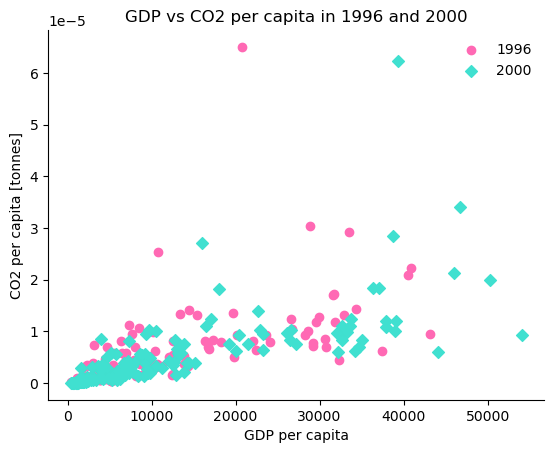

In [130]:
#####       GRAPH BOTTOM-RIGHT

    #extrapolate the yearly data 
GDP_1996 = df_countries[df_countries["year"] == 1996]
GDP_2000 = df_countries[df_countries["year"] == 2000]

    #create the per-capita columns for GDP and CO2
GDP_1996["per-Capita_CO2"] = GDP_1996["co2"] / GDP_1996["population"]
GDP_2000["per-Capita_CO2"] = GDP_2000["co2"] / GDP_2000["population"]

GDP_1996["per-Capita_GDP"] = GDP_1996["gdp"] / GDP_1996["population"]
GDP_2000["per-Capita_GDP"] = GDP_2000["gdp"] / GDP_2000["population"]

    #plot the just calculated data
plt.scatter(GDP_1996["per-Capita_GDP"], GDP_1996["per-Capita_CO2"], color="hotpink", label="1996")
plt.scatter(GDP_2000["per-Capita_GDP"], GDP_2000["per-Capita_CO2"], color="turquoise", marker="D", label="2000")

    #customize the plot
plt.legend(frameon=False, loc="upper right")
plt.title("GDP vs CO2 per capita in 1996 and 2000")
plt.ylabel("CO2 per capita [tonnes]")
plt.xlabel("GDP per capita")

    #retrieve the axis information, erase the frame
axis = plt.gca()
axis.spines["top"].set_visible(False)
axis.spines["right"].set_visible(False)